# treating outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=sns.load_dataset('car_crashes')

In [5]:
data.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
24,17.6,2.640,5.456,1.760,17.600,896.07,155.77,MS
22,14.1,3.384,3.948,13.395,10.857,1110.61,152.26,MI


In [6]:
data.isnull().mean()*100

total             0.0
speeding          0.0
alcohol           0.0
not_distracted    0.0
no_previous       0.0
ins_premium       0.0
ins_losses        0.0
abbrev            0.0
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


# outlier treatment

# boxplot

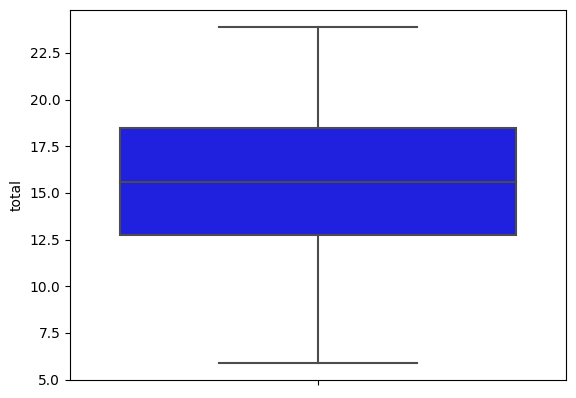

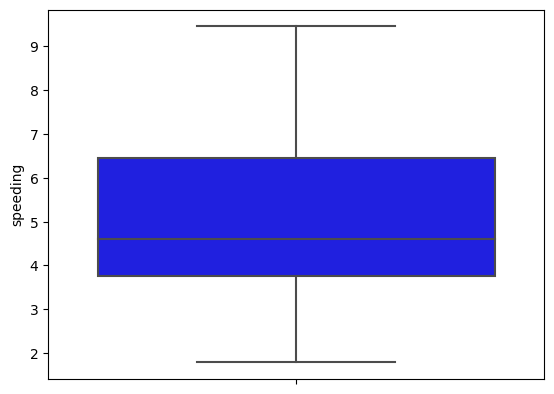

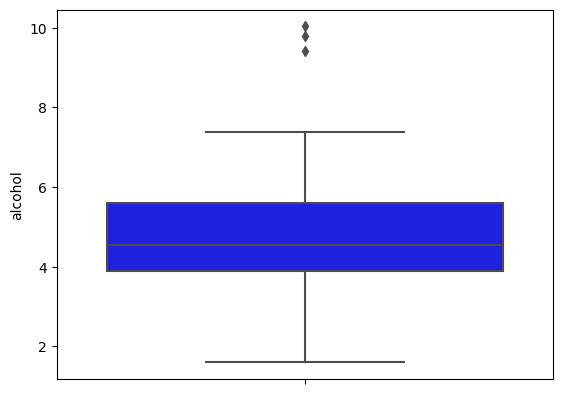

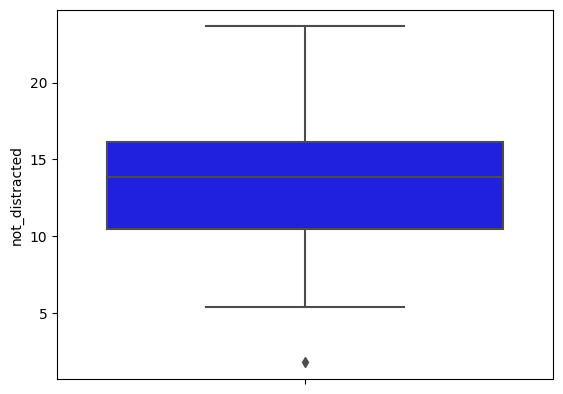

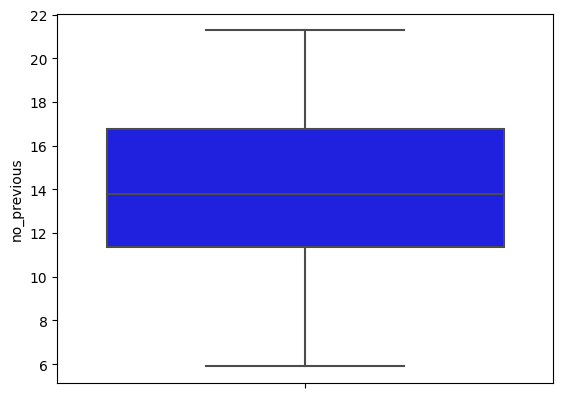

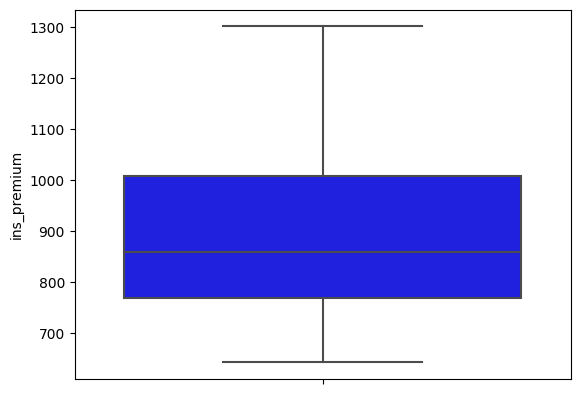

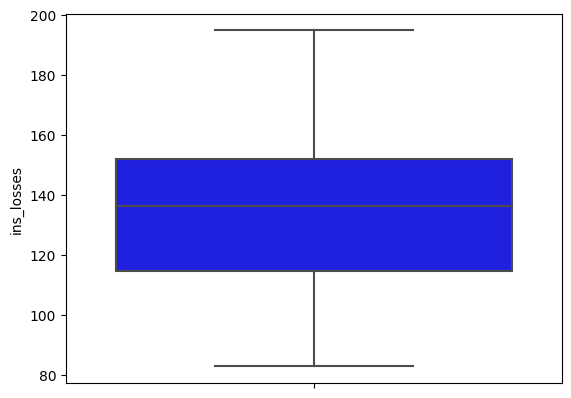

In [9]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i], color='blue')
        plt.show()

# setting outlier limit

In [10]:
def outlier_limit(col):
        Q3, Q1=np.nanpercentile(col,[75,25])
        IQR= Q3 -Q1
        UL=Q3+1.5*IQR
        LL=Q1-1.5*Q1
        return UL,LL

In [12]:
for i in data.columns:
    
    if data[i].dtype!='object':
        UL,LL = outlier_limit(data[i])
        data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

# lets plot the barplot again to see the difference

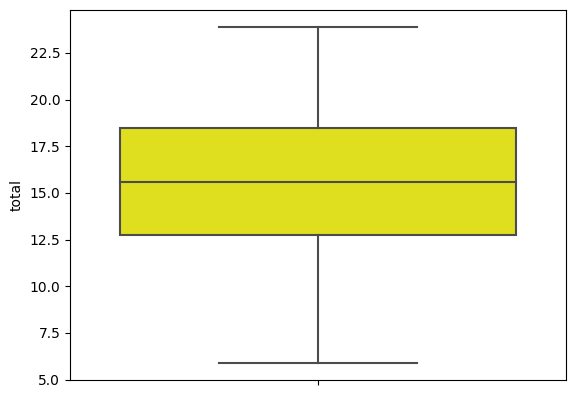

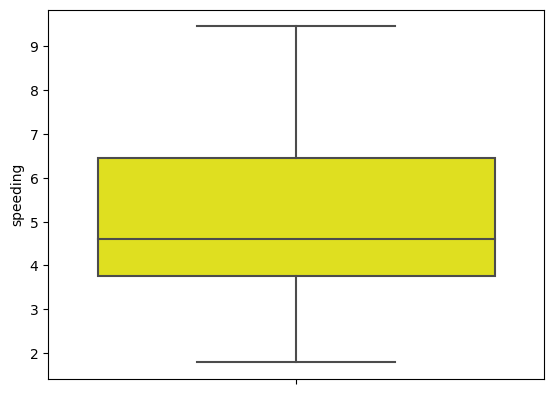

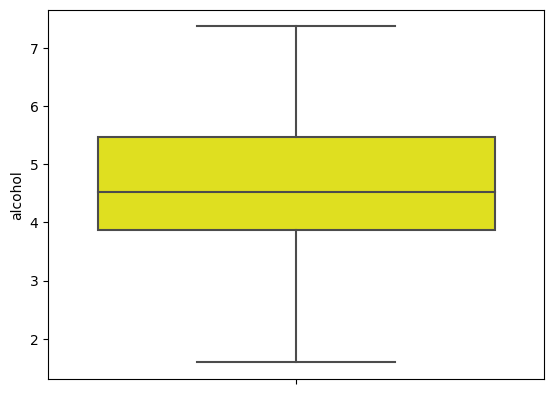

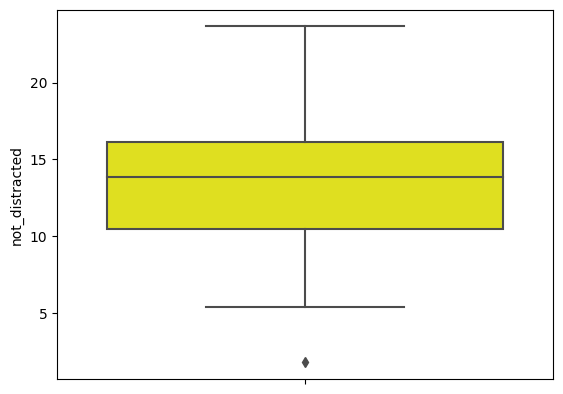

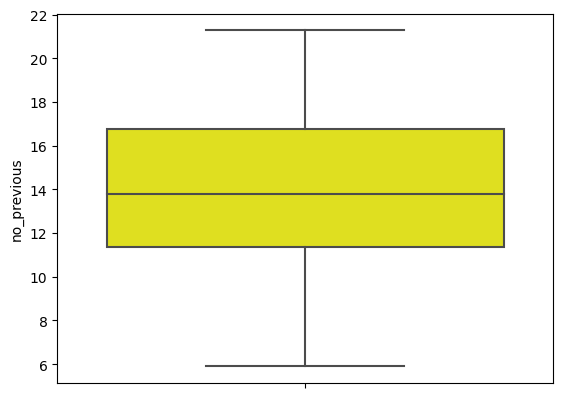

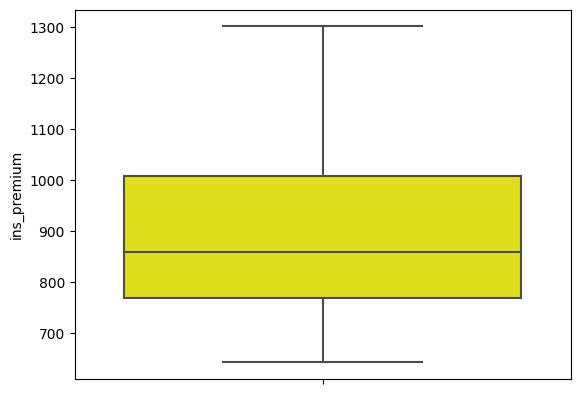

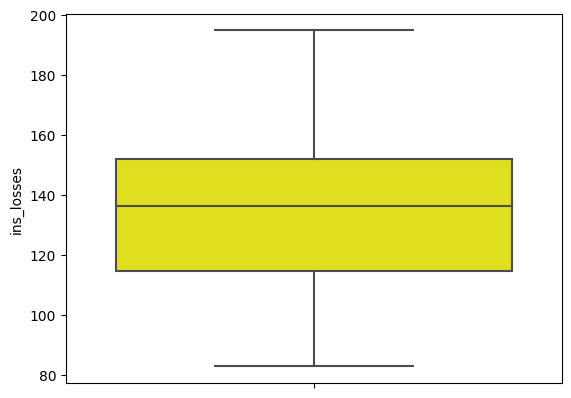

In [13]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i], color='yellow')
        plt.show()